# 회귀분석(Regression Analysis) - 수치예측
## 실습용 데이터 설정

- seaborn 'mpg' Data Set


In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')

- pandas DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# 1. Simple Linear Regression

- First-Order Function
> ## 1) 분석 변수 선택

In [ ]:
df1 = df[['mpg', 'cylinders', 'displacement', 'weight']]
df1.head(3)
# mpg : 연비
# cylinders : 실린더 수
# displacement : 배기량
# weight : 차 무게

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


> ## 2) 상관관계 그래프

- matplotlib

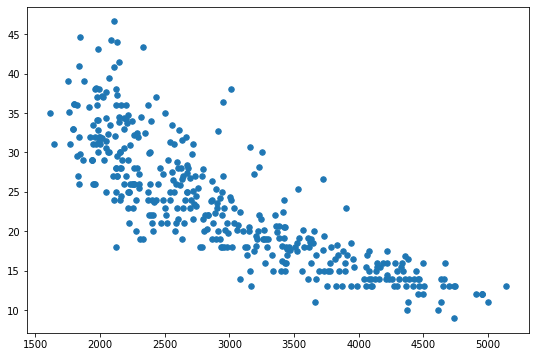

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.scatter(x = df1.weight, y = df1.mpg, s = 30)
plt.show()

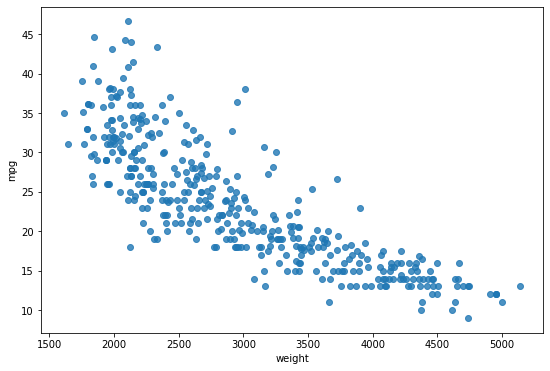

In [ ]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'weight', y = 'mpg', data = df1, fit_reg = False)
plt.show()

- pairplot

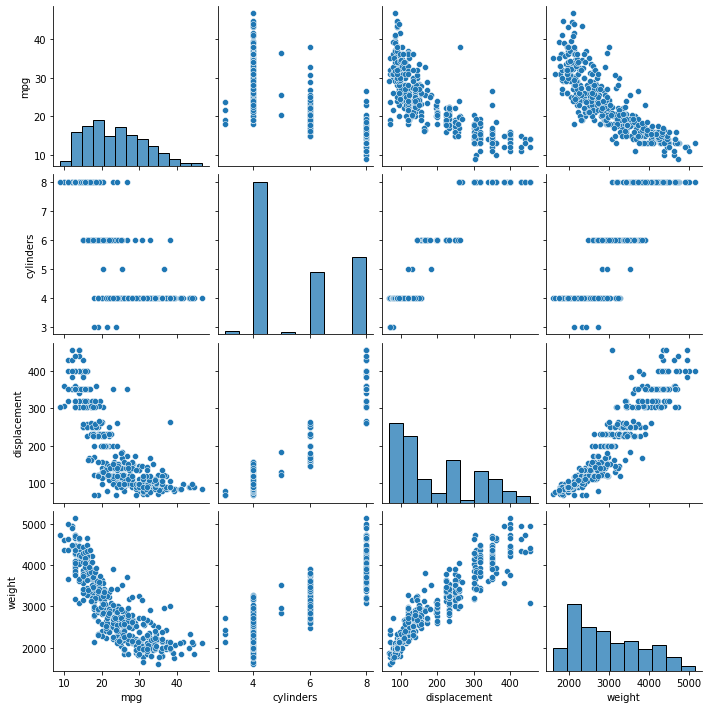

In [ ]:
sns.pairplot(df1)
plt.show()
# 1행에 mpg와의 그래프를 보면, cyliners(2열), displacement(3열), weight(4열) 분포가 비슷함을 알 수 있다
# 즉, 셋 중 어떤 것이 독립 변수로 들어가도 설명력의 비중이 비슷하다는 의미.
# 단일로 들어가나, 다중으로 들어가나 설명력에 크게 변화가 없거나, 오히려 다중에서 설명력이 줄어들 수 있다

> ## 3) 상관계수(Correlation Coefficient)

- Pearson's r
- mpg vs. weight

In [ ]:
from scipy import stats
stats.pearsonr(df1.mpg, df1.weight)[0]

-0.831740933244335

- mpg vs. displacement

In [ ]:
from scipy import stats
stats.pearsonr(df1.mpg, df1.displacement)[0]

-0.8042028248058978

- mpg vs. cylinders

In [ ]:
from scipy import stats
stats.pearsonr(df1.mpg, df1.cylinders)[0]

-0.7753962854205542

> ## 4) Train & Test Split

- 7 : 3 (278 : 120)

In [ ]:
from sklearn.model_selection import train_test_split
X = df1[['weight']]
y = df1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

# X_train, X_test = DF
# y_train, y_test = Series

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


> ## 5) 선형회귀 Modeling

- 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Weight 및 Bias

In [ ]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [-0.00766168]
bias(b) :  46.28223639092363


- 결정계수(R-Sqaure)

In [ ]:
RA.score(X_test, y_test)

0.7164499678296495

> ## 6) 모델 평가

- Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
y_hat = RA.predict(X_test)
mean_squared_error(y_test, y_hat)
# 실제값과 mpg(연비)가 roof(17.02)차이 날 수 있다. 

17.01518447782976

> ## 7) Visualization 

- y vs. y_hat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


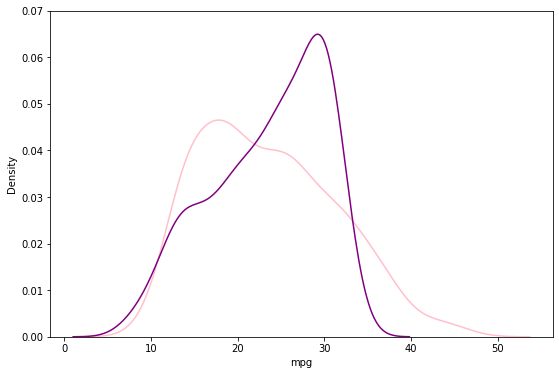

In [ ]:
y_hat1 = RA.predict(X)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = 'y', color = 'pink')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat', color = 'purple', ax = ax1)
plt.ylim(0, 0.07)
plt.show()
# 그래프가 겹쳐 있는 부분이 R^2값 : 독립변수로 종속변수 설명이 잘 되고 있는 부분(약 71.6%)
# 좀 더 높은 설명력을 갖기 위해 차수를 높인 회귀 진행해보자

# 2. Linear Regression

- High-Order Function

> ## 1) 분석 변수 선택

In [ ]:
df2 = df[['mpg', 'cylinders', 'horsepower', 'weight']]
df2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


> ## 2) Train & Test Split

- 7 : 3 (278 : 120)

In [ ]:
from sklearn.model_selection import train_test_split
X = df2[['weight']]
y = df2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

# X_train, X_test = DF
# y_train, y_test = Series

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


> ## 3) 선형회귀 Modeling

- 2차 다항식 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이터 : ', X_train.shape)
print('2차항 변환 데이터 : ', X_train_poly.shape)

변환 전 데이터 :  (278, 1)
2차항 변환 데이터 :  (278, 2)


- High-Order 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Weight 및 Bias

In [ ]:
# import numpy as np
# np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', NL.coef_)
print('bias(b) : ', '%.8f' % NL.intercept_)
# suppress : 자연상수로 표현 하지 않는다.
# precision : 소수점 10자리까지 나온다.

weight(w) :  [-1.75042457e-02  1.53383105e-06]
bias(b) :  60.88867527


- 결정계수(R-Sqaure)

In [ ]:
X_test_poly = poly.fit_transform(X_test)
NL.score(X_test_poly, y_test)
# 이차항이 포함되자 R^2 올라갔다. 

0.7525521808321769

> ## 4) 모델 평가

- Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
X_test_poly = poly.fit_transform(X_test)
mean_squared_error(y_test, NL.predict(X_test_poly))
# error는 17.015 -> 14.84로 줄었다. 
# 실제값과 mpg(연비)가 roof(14.84)차이 날 수 있다. 

14.848773810921921

> ## 5) Visualization

- High-Order Model

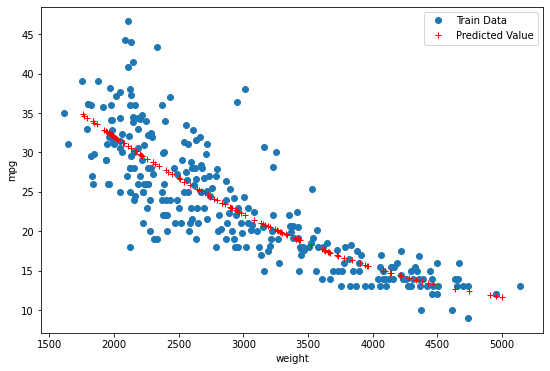

In [ ]:
y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize= (9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

- y vs. y_hat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


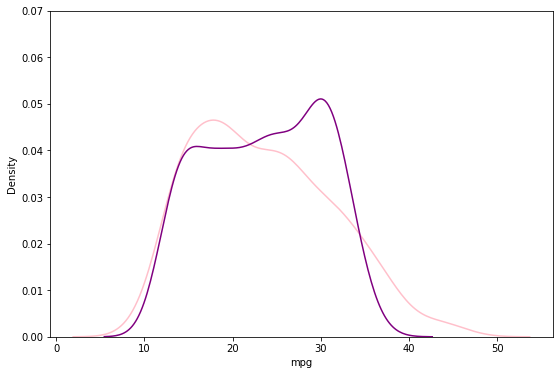

In [ ]:
X_ploy = poly.fit_transform(X)
y_hat2 = NL.predict(X_ploy)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = "y", color = 'pink')
ax2 = sns.distplot(y_hat2, hist = False, label = "y_hat", color = 'purple', ax = ax1)
plt.ylim(0, 0.07)
plt.show()
# 그래프가 겹쳐 있는 부분이 R^2값 : 독립변수로 종속변수 설명이 잘 되고 있는 부분(약 75.25%)
# 설명력을 높이기 위해서 다항회귀(독립변수에 cylinders 추가)로 진행해보자

# 3. Multivariate Regression

> ## 1) 분석 변수 선택

In [ ]:
df3 = df[['mpg', 'cylinders', 'displacement', 'weight']]
df3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


> ## 2) Train & Test Split

- 7 : 3 (278 : 120)

In [ ]:
from sklearn.model_selection import train_test_split
X = df3[['displacement', 'weight']]
y = df2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

# X_train, X_test = DF
# y_train, y_test = Series

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


> ## 3) 다중회귀 Modeling

- 모델 생성

In [ ]:
MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Weight 및 Bias

In [ ]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.01766533 -0.00567273]
bias(b) :  43.74652237


- 결정계수(R-Sqaure)

In [ ]:
MR.score(X_test, y_test)
# 설명력이 72.1%로 그 전보다 떨어진 것을 확인

0.720971246285159

> ## 4) 모델 평가

- Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, MR.predict(X_test))
# error도 14.84보다 올라갔다.

16.743872969214195

> ## 5) Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


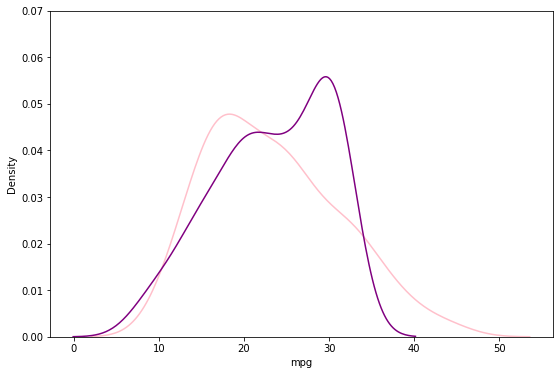

In [ ]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test', color = 'pink')
ax2 = sns.distplot(y_hat3, hist =False, label = 'y_hat', color = 'purple', ax = ax1)
plt.ylim(0, 0.07)
plt.show()
# 겹치는 부분이 좁아졌으므로 설명력이 떨어졌다고 할 수 있다.

# 4. 최종 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

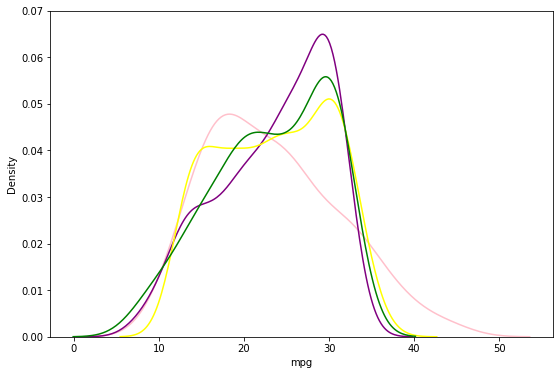

In [ ]:
y_hat3 = MR.predict(X_test)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test', color = 'pink')
ax2 = sns.distplot(y_hat1, hist =False, label = 'y_hat', color = 'purple', ax = ax1)
ax3 = sns.distplot(y_hat2, hist =False, label = 'y_hat', color = 'yellow', ax = ax1)
ax4 = sns.distplot(y_hat3, hist =False, label = 'y_hat', color = 'green', ax = ax1)
plt.ylim(0, 0.07)
plt.show()
# 겹치는 부분이 좁아졌으므로 설명력이 떨어졌다고 할 수 있다.

### 
# The End
###